# Compositi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, f'C:../')
import Composito as cp

## Unidirezionale

<img src="../image/im.jpg">

In [2]:
ply =  {'s':0.26,'Ex':42000,'Ey':14000,'v':0.2,'G':7000,'fabric':False,'theta':0}

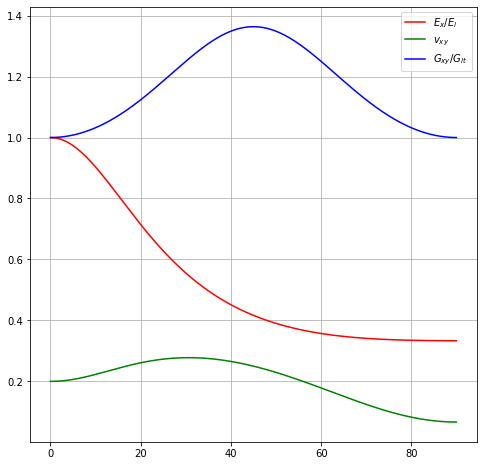

In [3]:
th_array = np.arange(0,90,0.01)
res = []
for th in th_array:
    ply['theta'] = th
    Q = cp.Q_ply(ply)
    res.append(cp.get_engineering_constants(Q))
res = np.array(res)
#
_,_ = plt.subplots(1,1,figsize=(8,8))
plt.plot(th_array,res[:,0]/res[0,0],c='r',label='$E_x/E_l$')
plt.plot(th_array,res[:,2],c='g',label='$v_{xy}$')
plt.plot(th_array,res[:,3]/res[0,3],c='b',label='$G_{xy}/G_{lt}$')

plt.grid()
plt.legend()
plt.show()

## Tessuto

<img src="../image/im2.jpg">

In [4]:
ply =  {'s':0.26,'Ex':21000,'Ey':21000,'v':0.2,'G':3500,'fabric':True,'theta':0}

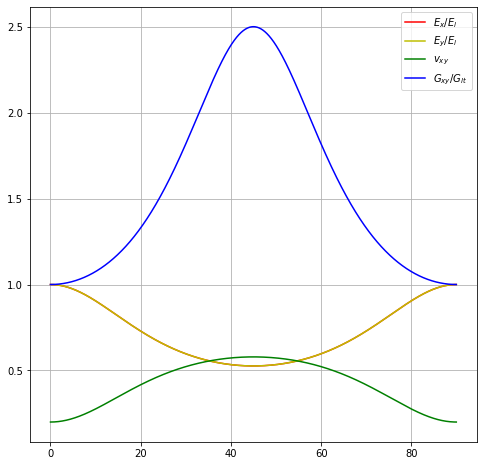

In [5]:
res = []
for th in th_array:
    ply['theta'] = th
    Q = cp.Q_ply(ply)
    res.append(cp.get_engineering_constants(Q))
res = np.array(res)    
_,_ = plt.subplots(1,1,figsize=(8,8))
plt.plot(th_array,res[:,0]/res[0,0],c='r',label='$E_x/E_l$')
plt.plot(th_array,res[:,1]/res[0,0],c='y',label='$E_y/E_l$')

plt.plot(th_array,res[:,2],c='g',label='$v_{xy}$')
plt.plot(th_array,res[:,3]/res[0,3],c='b',label='$G_{xy}/G_{lt}$')

plt.grid()
plt.legend()
plt.show()

### Esempio A ([link](https://ntrs.nasa.gov/api/citations/19950009349/downloads/19950009349.pdf) pag 31 e 46)

laminato con 4 ply [0,+45]s simmetrico con:

- E1 = 20010000 [lb/$in^2$]
- E2 = 1301000 
- G12 = 1001000
- v12 = 0.3 (v21 = 0.02)
- thk = 0.005

Determino per la ply a zero gradi:

$Q_{ij} = \begin{pmatrix} 20130785 & 392656 & 0 \\ 392656  & 130853 & 0\\ 0 & 0 & 1001000\end{pmatrix}$


In [6]:
from Composito import get_laminate,Q_ply,get_engineering_constants,get_compliance,get_concatenate_stiffness

def matprint(mat, fmt="g"): # https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
        
ply_0 = {'s':0.005,'Ex':20010000,'Ey':1301000,'v':0.3,'G':1001000,'fabric':False,'theta':0}
ply_c = {'s':0.005,'Ex':20010000,'Ey':1301000,'v':0.3,'G':1001000,'fabric':False,'theta':45}
print(f" ** Noti Ex,Ey,v12 trovo v21 = {ply_0['v']*(ply_0['Ey']/ply_0['Ex'])}")
print(f" ** Q per la ply a 0 gradi \n{Q_ply(ply_0)}")

 ** Noti Ex,Ey,v12 trovo v21 = 0.019505247376311843
 ** Q per la ply a 0 gradi 
[[20127779.19369262   392597.31230876        0.        ]
 [  392597.31230876  1308657.70769586        0.        ]
 [       0.                0.          1001000.        ]]


Determino per la ply a 45 gradi:

$Q_{ij} = \begin{pmatrix} 6557237 & 4557238 & 4705483 \\ 4705483  & 6557237 & 4705483\\ 4705483 & 4705483 & 5163582\end{pmatrix}$

In [7]:
print(f" ** Q per la ply a 45 gradi \n {Q_ply(ply_c)}")

 ** Q per la ply a 45 gradi 
 [[6556407.8815015  4554407.8815015  4704780.37149919]
 [4554407.8815015  6556407.8815015  4704780.37149919]
 [4704780.37149919 4704780.37149919 5162810.56919274]]


Determino i termini di rigidezza del laminato (matrice ABD)
### A

$$A_{ij} = \begin{pmatrix} 266880 & 49479 & 47055 \\ 47055  & 78661 & 47055\\ 47055 & 47055 & 61646\end{pmatrix}$$ []


### D

$$D_{ij} = \begin{pmatrix} 12.3 & 0.609 & 0.392 \\ 0.609  & 1.31 &  0.392\\ 0.392 & 0.392 & 1.014\end{pmatrix}$$ [inlb]



In [8]:
laminato = [ply_0,ply_c,ply_c,ply_0]
A,B,D,_ = get_laminate(laminato)
print('- A')
print(A)
#print('- B')
#print(B)
print('- D')
print(D)

- A
[[266841.87075194  49470.0519381   47047.80371499]
 [ 49470.0519381   78650.65589197  47047.80371499]
 [ 47047.80371499  47047.80371499  61638.10569193]]
- D
[[12.28757185  0.60854909  0.39206503]
 [ 0.60854909  1.30975099  0.39206503]
 [ 0.39206503  0.39206503  1.01415088]]


Determino 
- Ex = S_x/e_x = (N_x/h)/e_x = 11333000
- Nx = A*e_x


In [9]:
Ex,Ey,vxy,Gxy = get_engineering_constants(A,s = 4*ply_0['s'])
print(f'[Ex,Ey,v,Gxy] = ... {(Ex,Ey,vxy,Gxy)}')

[Ex,Ey,v,Gxy] = ... (11331461.01058543, 2097169.9082667995, 0.31724502386941955, 32202.145686960823)


### Esempio B ([link](https://ntrs.nasa.gov/api/citations/19950009349/downloads/19950009349.pdf) pag 38)

laminato 2 ply [0,+45] stesso di prima. Nota Aij, pari all'esempio precedente.

Determino per LAMINATO:

### B

$$B_{ij} = \begin{pmatrix} 170 & -52 & -59 \\ -52  & -66 &  -59\\ -59 & -59 & -52\end{pmatrix}$$ [lb]


### D
 
$$D_{ij} = \begin{pmatrix} 1.112 & 0.206 & 0.196 \\ 0.206  & 0.328 &  0.196\\ 0.196 & 0.196 & 0.257\end{pmatrix}$$  [inlb]

Quindi le costnati ingegeristiche:

- Ex = 5839000

In [11]:
laminato = [ply_0,ply_c]
A,B,D,_ = get_laminate(laminato)
print('- A')
print(A)
print('- B')
print(B)
print('- D')
print(D)
rigidezza = get_concatenate_stiffness(A,B,D)
Ex,Ey,vxy,Gxy = get_engineering_constants(rigidezza,s = 2*ply_0['s'])
print(f'[Ex,Ey,v,G] = ... {(Ex,Ey,vxy,Gxy)}')

- A
[[133420.93537597  24735.02596905  23523.9018575 ]
 [ 24735.02596905  39325.32794599  23523.9018575 ]
 [ 23523.9018575   23523.9018575   30819.05284596]]
- B
[[169.6421414  -52.02263211 -58.80975464]
 [-52.02263211 -65.59687717 -58.80975464]
 [-58.80975464 -58.80975464 -52.02263211]]
- D
[[1.11184113 0.20612522 0.19603252]
 [0.20612522 0.32771107 0.19603252]
 [0.19603252 0.19603252 0.25682544]]
[Ex,Ey,v,G] = ... (5867147.696611008, 1838182.0459857346, 0.18170883935272183, 12880.001164373278)
